# Visualisierung der Auswertung von GiveMe5W1H + News-Please

In [3]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [4]:
font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 25}

matplotlib.rc('font', **font)

### CSV mit den Bewertungen der Fragen

In [6]:
data = pd.read_csv("data/GM5W1H_NewsPlease_results.csv", sep=';', header=0)

In [7]:
data.head()

,Who,What,When,Where,Why,How,Category,Wortzahl
0,NaN,NaN,1.0,1.0,NaN,1.0,Business,272
1,NaN,NaN,NaN,NaN,0.0,0.0,Business,303
2,1.0,1.0,NaN,NaN,NaN,1.0,Business,900
3,0.5,1.0,NaN,NaN,0.0,0.5,Business,310
4,1.0,1.0,NaN,1.0,0.5,0.0,Business,746


#### Mittelwerte der Bewertungen der Fragen zu den einzelnen Kategorien:

In [10]:
categories = ['Business', 'Entertainment', 'Politics', 'Sport', 'Tech'] 
questions = ['Who', 'What', 'When', 'Where', 'Why', 'How']

In [11]:
dict_cat = {}
dict_cat_withNaN = {}

for category in categories:
    
    temp = data[data['Category'] == category].drop('Category', axis = 1)
    accuracies = []
    accuracies_withNaN = []
    
    for q in questions:
        accuracies.append(temp[q].dropna().mean())
        accuracies_withNaN.append(temp[q].fillna(0).mean())
        
    dict_cat[category] = accuracies 
    dict_cat_withNaN[category] = accuracies_withNaN

In [12]:
df = pd.DataFrame(dict_cat, index = questions)
df_withNaN = pd.DataFrame(dict_cat_withNaN, index = questions)

#### Mittelwerte zusammengefasst zu einem DataFrame:

In [15]:
Accuracy = pd.concat([df, df_withNaN], keys=['withoutNaN', 'withNaN'])

In [16]:
Accuracy

Business  Entertainment  Politics     Sport      Tech
withoutNaN Who    0.884615       0.900000  0.777778  0.857143  0.833333
           What   0.846154       0.666667  0.722222  0.892857  0.833333
           When   1.000000       0.500000  1.000000  0.800000  0.666667
           Where  0.875000       0.750000  1.000000  1.000000  0.900000
           Why    0.350000       0.166667  0.200000  0.366667  0.318182
           How    0.657895       0.684211  0.600000  0.562500  0.815789
withNaN    Who    0.575000       0.675000  0.350000  0.600000  0.500000
           What   0.550000       0.500000  0.325000  0.625000  0.500000
           When   0.150000       0.050000  0.250000  0.200000  0.100000
           Where  0.350000       0.225000  0.450000  0.400000  0.225000
           Why    0.175000       0.150000  0.150000  0.275000  0.175000
           How    0.625000       0.650000  0.600000  0.450000  0.775000

#### Plots zu den Kategorien:

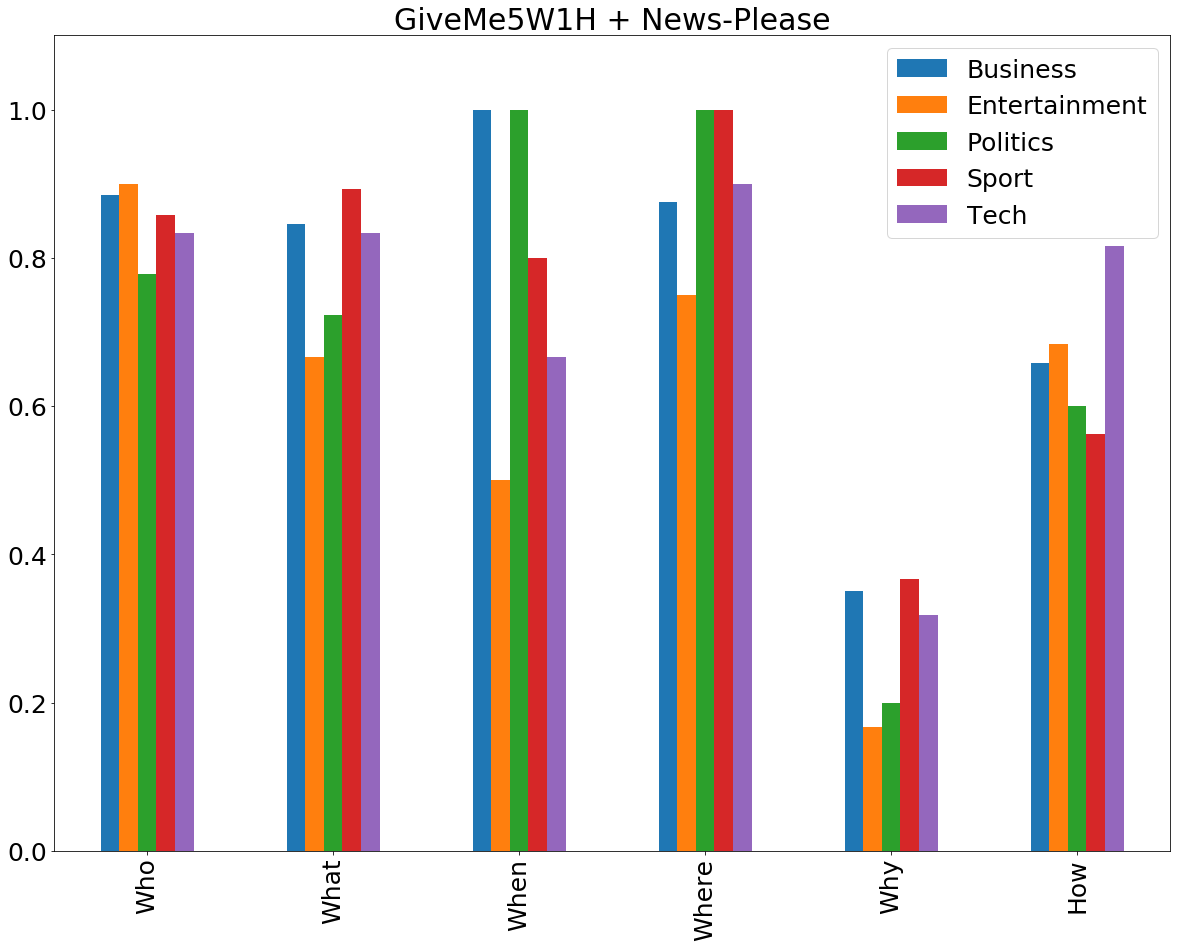

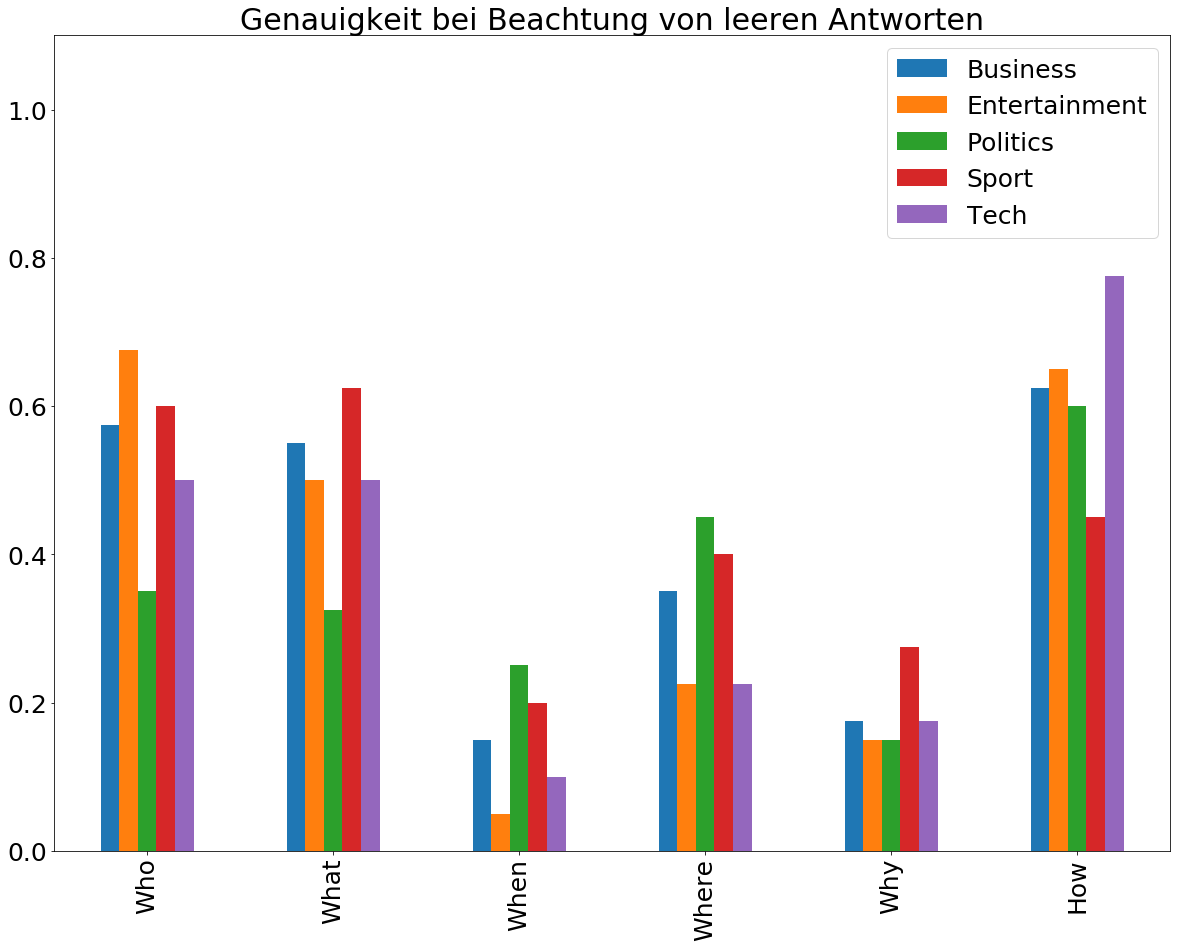

In [82]:
df.plot(figsize=(20, 15), kind = "bar", ylim = (0,1.1), title="GiveMe5W1H + News-Please")
df_withNaN.plot(figsize=(20, 15), kind = "bar", ylim = (0,1.1),  title="Genauigkeit bei Beachtung von leeren Antworten")
plt.show()

#### Darstellung der fehlenden Antworten mit MissingNo:

In [17]:
import missingno as msno

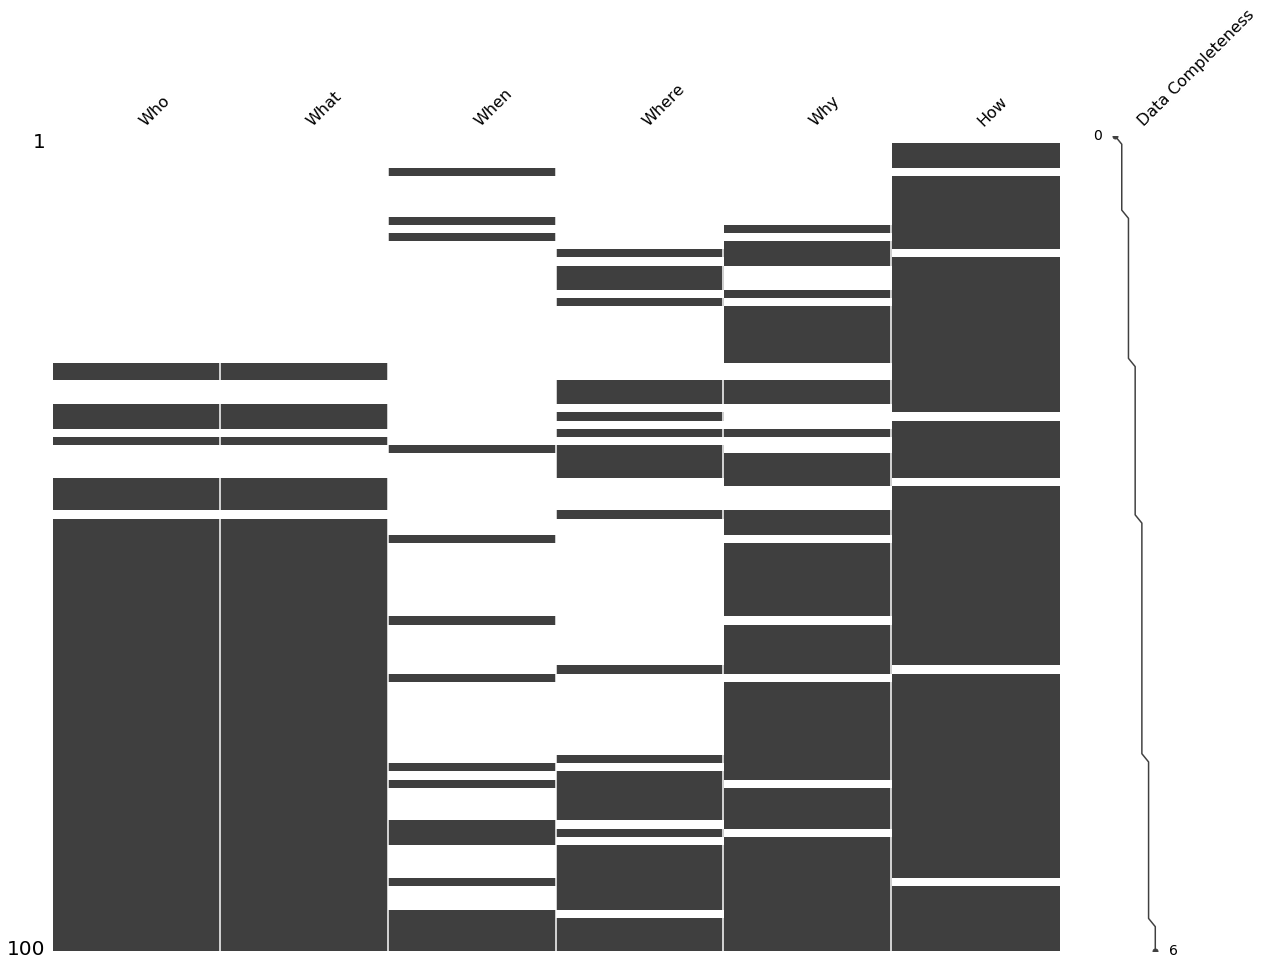

In [19]:
## Daten zur anschaulicheren Visualisierung sortiert:
sorted_data_1 = msno.nullity_sort(data.drop('Category', axis = 1).drop('Wortzahl', axis = 1), sort='ascending')
msno.matrix(sorted_data_1, figsize = (20,15), labels="True")
plt.show()

#### Dataframe zu kummulierten Mittelwerten:

In [24]:
df_acc_cat = df
df_acc_cat = df_acc_cat.drop(['Why','How'])

cat_4 = df_acc_cat.mean().to_numpy()
cat_6 = df.mean().to_numpy()

cat_4 = np.append(cat_4, cat_4.mean())
cat_6 = np.append(cat_6, cat_6.mean())

dict_combined = {}
    
dict_combined['4W'] = cat_4
dict_combined['5W1H'] = cat_6

indices = ['Business', 'Entertainment', 'Politics', 'Sport', 'Tech', 'All']
df_combined = pd.DataFrame(dict_combined, index = indices)

df_combined.T

,Business,Entertainment,Politics,Sport,Tech,All
4W,0.901442,0.704167,0.875000,0.887500,0.808333,0.835288
5W1H,0.768944,0.611257,0.716667,0.746528,0.727884,0.714256


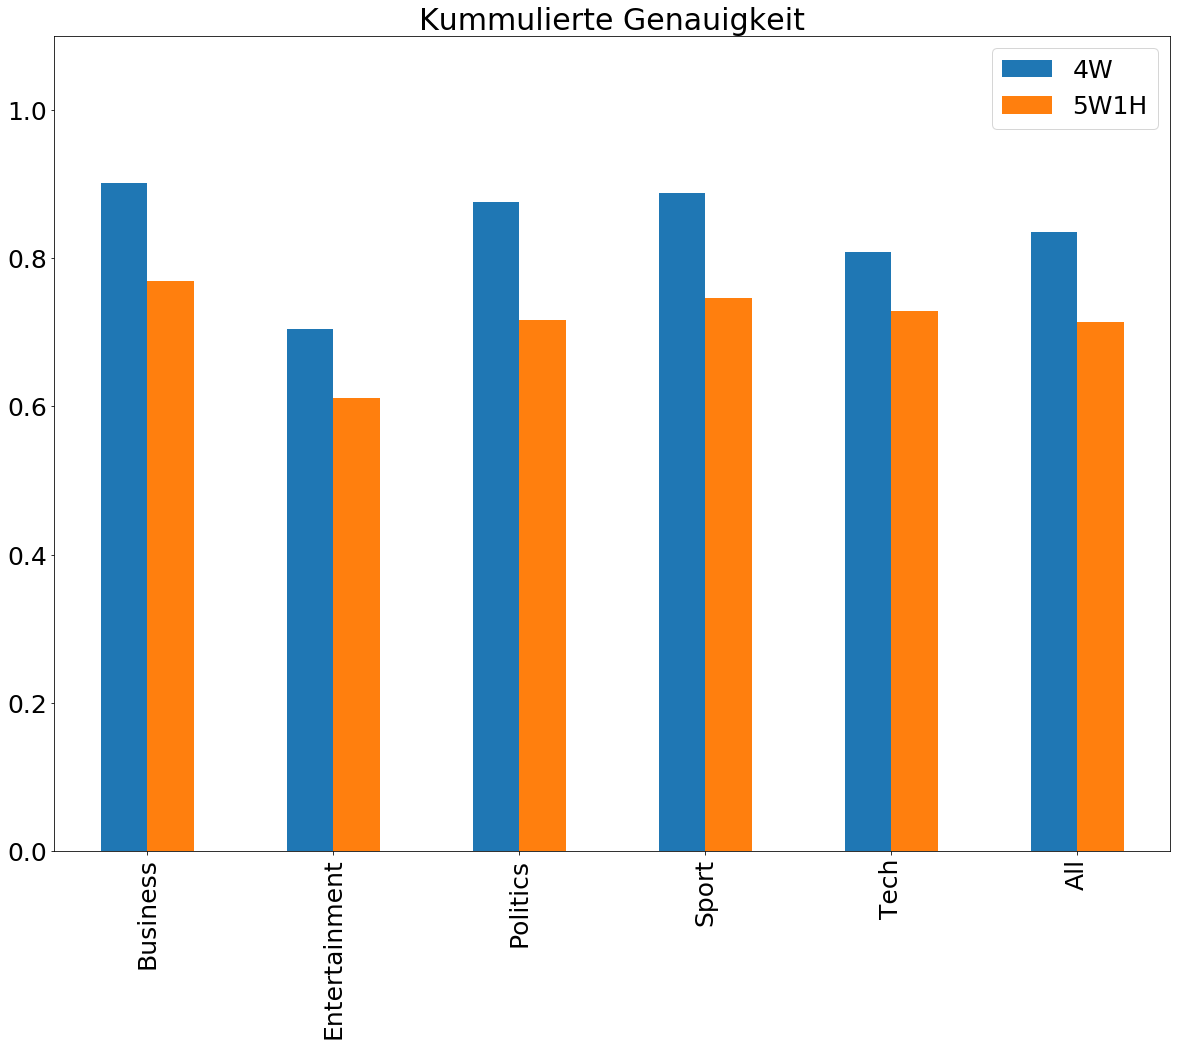

In [25]:
df_combined.plot(figsize=(20, 15), kind = "bar", ylim = (0,1.1), title="Kummulierte Genauigkeit")
plt.show()

,4W,5W1H
Business,0.901442,0.768944
Entertainment,0.704167,0.611257
Politics,0.875000,0.716667
Sport,0.887500,0.746528
Tech,0.808333,0.727884
All,0.835288,0.714256


In [32]:
df_combined.T

,Business,Entertainment,Politics,Sport,Tech,All
4W,0.901442,0.704167,0.875000,0.887500,0.808333,0.835288
5W1H,0.768944,0.611257,0.716667,0.746528,0.727884,0.714256


#### Ungenutzte Visualisierung der Anzahl an Antworten pro Frage und Abhängigkeiten der Antworten:

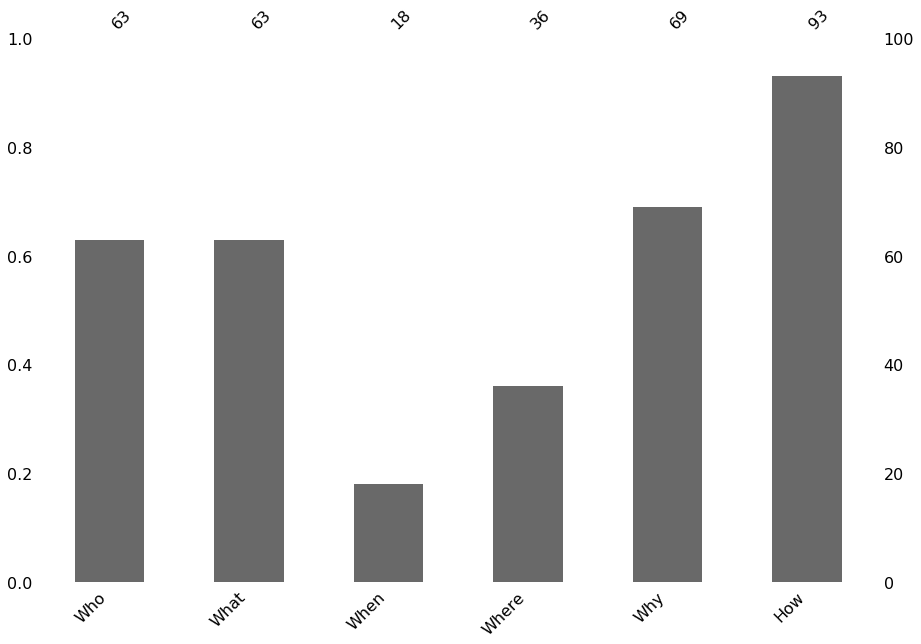

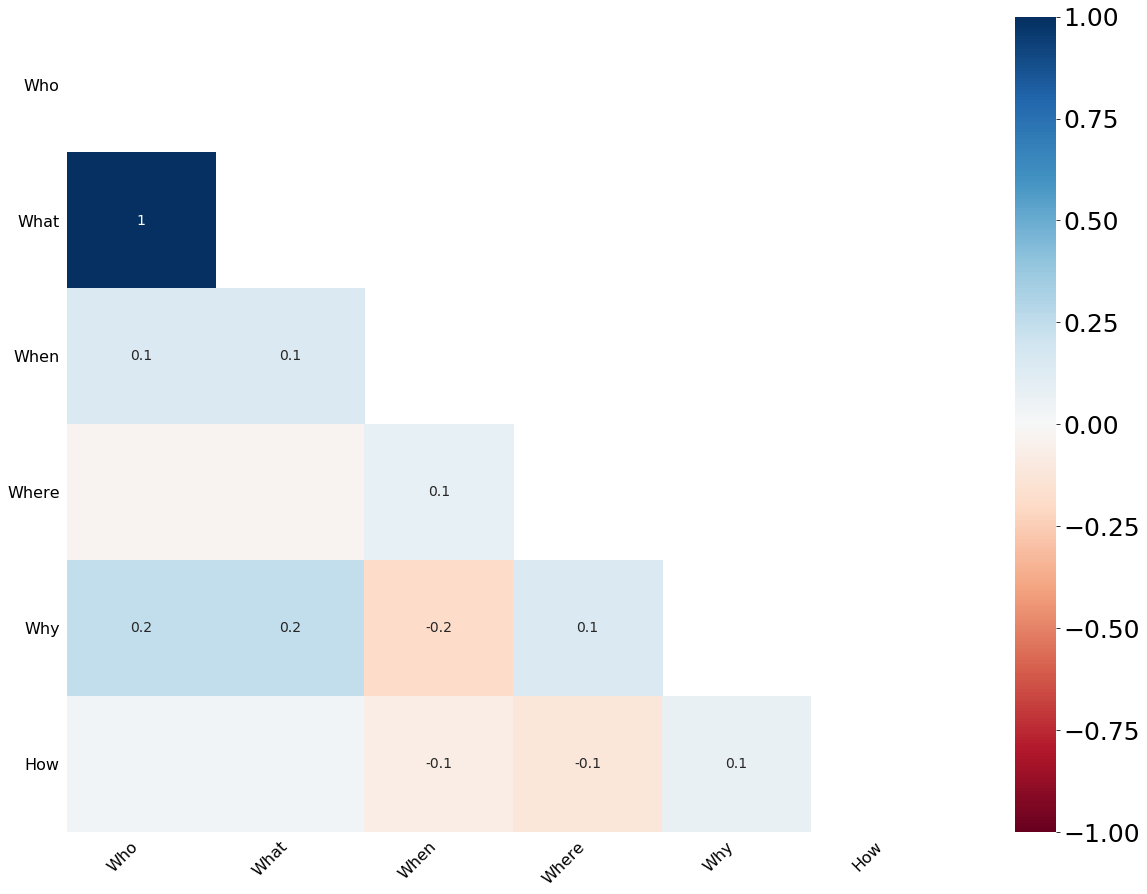

In [27]:
msno.bar(data.drop('Category', axis = 1).drop('Wortzahl', axis = 1), figsize = (15,10))
plt.show()

msno.heatmap(data.drop('Category', axis = 1).drop('Wortzahl', axis = 1), figsize = (20,15))
plt.show()

#### Bewertungen nach Artikellänge:

In [35]:
data.groupby(['Category']).mean()

,Who,What,When,Where,Why,How,Wortzahl
Category,,,,,,,
Business,0.884615,0.846154,1.000000,0.875,0.350000,0.657895,644.4
Entertainment,0.900000,0.666667,0.500000,0.750,0.166667,0.684211,605.9
Politics,0.777778,0.722222,1.000000,1.000,0.200000,0.600000,962.4
Sport,0.857143,0.892857,0.800000,1.000,0.366667,0.562500,564.6
Tech,0.833333,0.833333,0.666667,0.900,0.318182,0.815789,733.7


In [60]:
lengths = ['l1', 'l2', 'l3', 'l4']

In [68]:
dict_len = {}

for length in lengths:
    
    temp = data[data['Wortzahl'] == length].drop(['Category', 'Wortzahl'], axis = 1)
    accuracies_len = []
    
    for q in questions:
        accuracies_len.append(temp[q].dropna().mean())
        
    dict_len[length] = accuracies_len 

In [75]:
df_len = pd.DataFrame(dict_len, index = questions)

df_acc_len = df_len
df_acc_len = df_acc_len.drop(['Why','How'])

cat_4_len = df_acc_len.mean().to_numpy()
cat_6_len = df_len.mean().to_numpy()

dict_combined_len = {}
    
dict_combined_len['4W'] = cat_4_len
dict_combined_len['5W1H'] = cat_6_len

indices_len = ['0-500', '500-1000', '1000-1500', '1500-2000']
df_combined_len = pd.DataFrame(dict_combined_len, index = indices_len)

df_combined_len

,4W,5W1H
0-500,0.888889,0.759170
500-1000,0.805653,0.663712
1000-1500,0.825000,0.739153
1500-2000,0.812500,0.645833


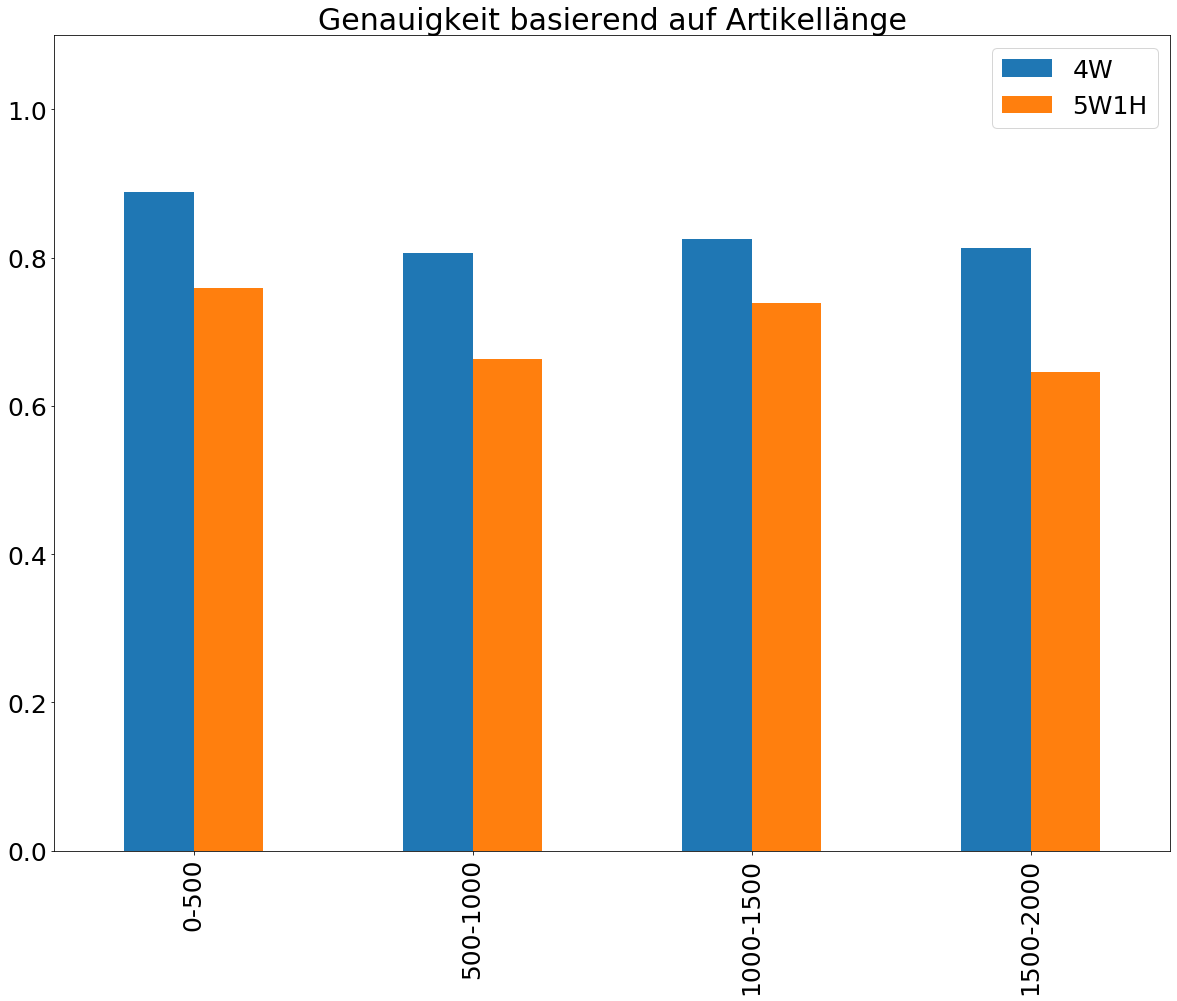

In [76]:
df_combined_len.plot(figsize=(20, 15), kind = "bar", ylim = (0,1.1), title="Genauigkeit basierend auf Artikellänge")
plt.show()